앙상블(ensemble) 이란?

- 여러 개의 모델(classifier)을 사용해서 예측 결합함으로써 보다 정확한 최종 예측을 도출하는 방법

- 단일 모델보다 더 다양한 관점에서 데이터를 학습하고 예측하기 때문에 일반적으로 성능이 우수함

- 결과가 안 좋은 모델들(약한 분류기)을 모아서 좋은 결과를 내도록 하는 것


앙상블의 종류

- voting :  서로 다른 여러 모델의 예측을 조합하여 최종 예측을 수행
            hard voting (여러 모델 중 다수결로 더 많은 것 선택) / soft voting(가중치를 부여한 평균)

- Bagging : 같은 유형의 모델을 병렬 결합 (Bootstrapping aggregation) 
            같은 모델들이 데이터를 서로 다르게 학습
            배깅 안에 랜덤 포레스트(Random Forest)가 있음
            Random Forest : dicision tree가 여러개 (bagging)

- Boosting : 여러 개의 모델들을 순차적으로 학습하여 
             결과에 대한 가중치를 부여 (이전모델의 학습 결과를 받아서 다시 사용)
             이전 모델이 잘못 예측한 샘플에 가중치를 부여하여 학습
             (오답에 높은 가중치 > 오답을 정답으로 맞히기 위해)
             Gradient Boosting : 이전 트리의 오차 보완 (boosting)

위 3개를 주로 기억해야 함

- Stacking : 위의 여러개의 개별적 모델을 학습하여 예측한 데이터셋을 
             최종 메타 모델이 사용하여 결과 도출

대표적인 앙상블 알고리즘

- Random Forest : dicision tree가 여러개 (bagging)

- Gradient Boosting : 이전 트리의 오차 보완 (boosting)

- XGBoost / LightGBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mr = pd.read_csv("../datasets/mushrooms.csv")
mr

In [ ]:
mr.info()

# Dtype이 object면 문자열이기 때문에 숫자로 바꿔야 함

In [ ]:
# e : (edible 식용)
# p : (poisonous 독)
mr.iloc[:, 0].value_counts()

In [ ]:
ord("a")
# a의 아스키코드가 97
# 문자열을 숫자로 바꿔줌

In [ ]:
chr(ord("a"))
# 숫자열을 문자열로 바꿔줌

In [ ]:
mr.iterows()

In [22]:
x = list()
y = list()

for idx, row in mr.iterrows():
    y.append(row.iloc[0])

    row_data = list()
    for data in row.iloc[1:]:
        row_data.append(ord(data))
    x.append(row_data)

In [21]:
# 5개 까지만 보자
print(x[:5])
print(y[:5])

[[120, 115, 110, 116, 112, 102, 99, 110, 107, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 121, 116, 97, 102, 99, 98, 107, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 103], [98, 115, 119, 116, 108, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 109], [120, 121, 119, 116, 112, 102, 99, 110, 110, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 103, 102, 110, 102, 119, 98, 107, 116, 101, 115, 115, 119, 119, 112, 119, 111, 101, 110, 97, 103]]
['p', 'e', 'e', 'p', 'e']


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [25]:
# n_estimators : 모델(decision tree)의 갯수
# n_jobs : 병렬처리할 cpu 갯수 (-1 : cpu 전체)

model = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=-1)

In [26]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [28]:
predict = model.predict(x_test)
accuracy_score(y_test, predict)

0.9864615384615385

In [29]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           e       0.97      1.00      0.99       820
           p       1.00      0.97      0.99       805

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [30]:
model.estimator_

DecisionTreeClassifier()

In [31]:
model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=87983815),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1169005565),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1602817584),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1965435558),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=978830152),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=668356202),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1317402805),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=901963602),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=490608262),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1058451576),
 DecisionTreeClassifier(max_depth=5, max_featu

In [32]:
from sklearn.tree import plot_tree

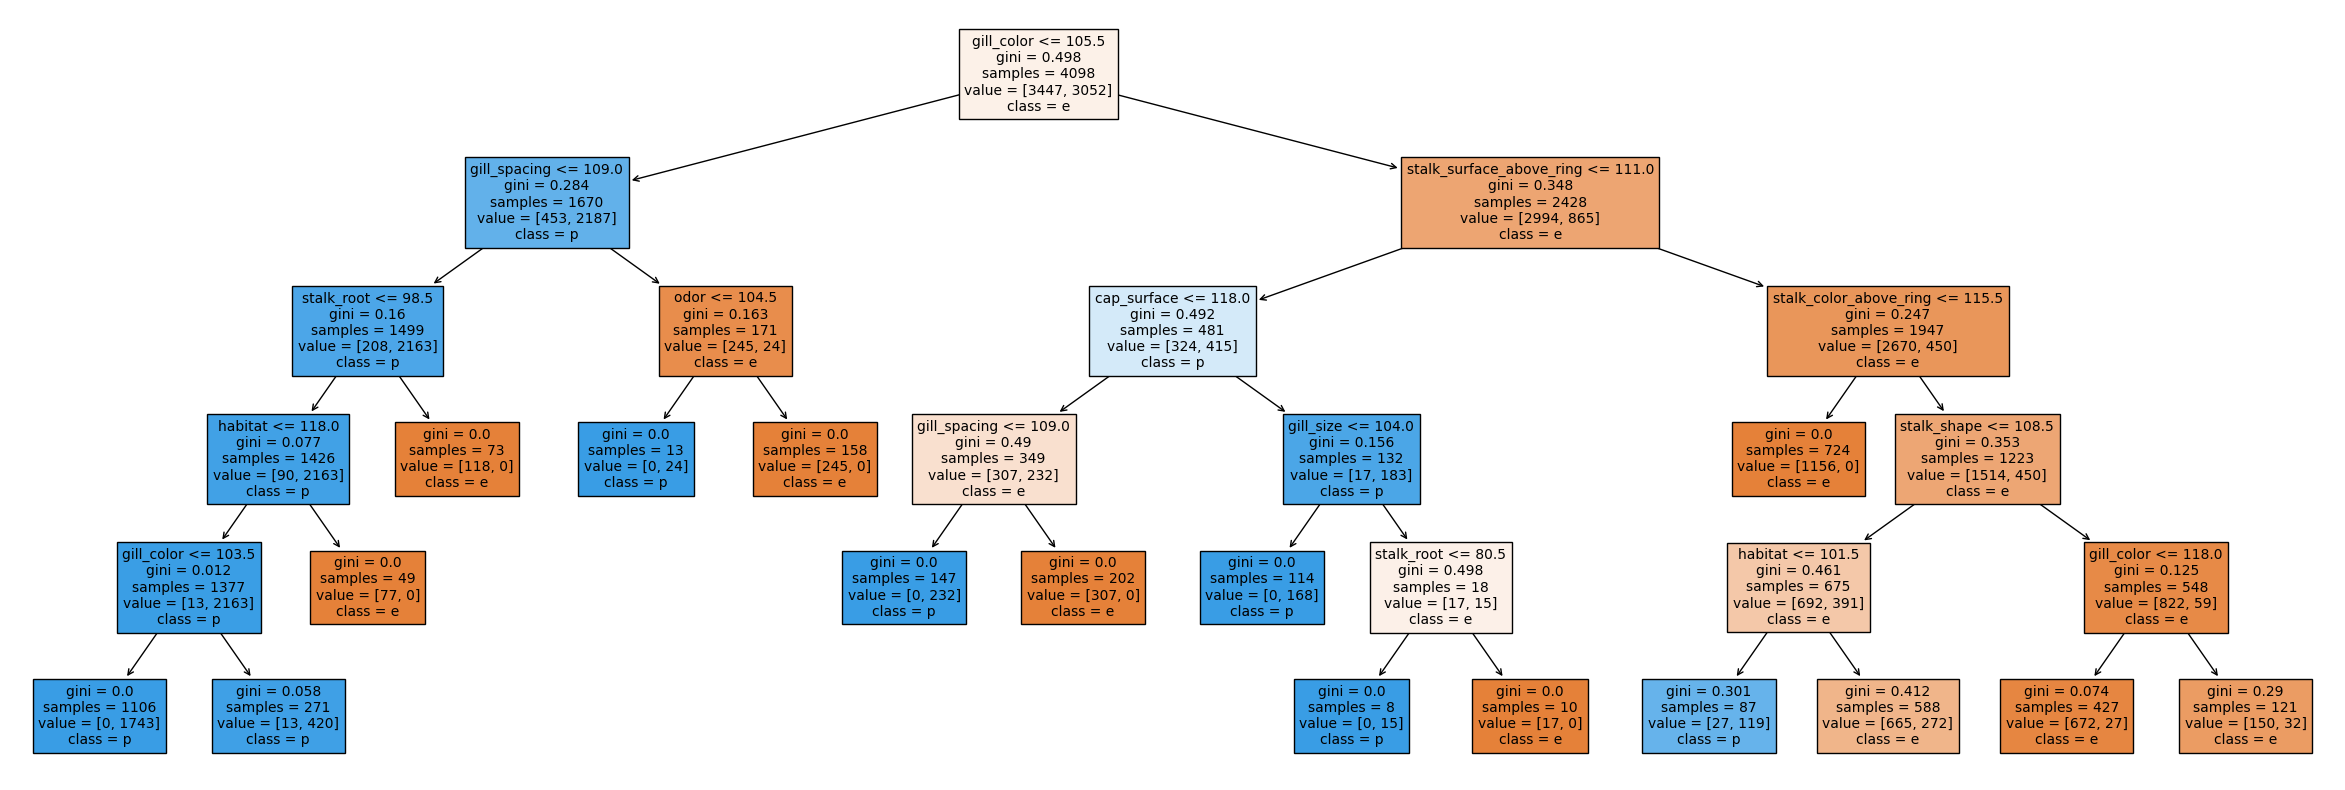

In [35]:
estimator = model.estimators_[0]
plt.figure(figsize=(30, 10))
plot_tree(estimator, class_names=["e", "p"],
          feature_names=list(mr.columns[1:]),
          filled=True, fontsize=10)

plt.show()